### Marvel API
 - Use this Jupyter notebook to make requests of Marvel API
 - Specifically, we will want to identify all characters in each "event"

In [77]:
# Used reference to query API, as I was unfamiliar with building timestamps and hashes required for accessing API:
# https://stackoverflow.com/questions/53356636/invalid-hash-timestamp-and-key-combination-in-marvel-api-call

# import dependencies
import pandas as pd
import hashlib  #this is needed for the hashing library
import time   #this is needed to produce a time stamp
import json   #Marvel provides its information in json format
import requests #This is used to request information from the API
import matplotlib.pyplot as plt
# import api keys for Marvel API
from paulkeys import public, private

#Constructing the Hash
m = hashlib.md5()   #Assigning variable m to md5 hashing ('the hash')

ts = str(time.time())   #This creates the time stamp as a string
ts_byte = bytes(ts, 'utf-8')  #This converts the timestamp into a byte 
priv_byte = bytes(private, 'utf-8') #This converts the private API key into a byte 
pub_byte = bytes(public, 'utf-8') #This converts the public API key into a byte
m.update(ts_byte)  # Add the timestamp (in byte format) to the hash
m.update(priv_byte) # Add the private key (in byte format) to the hash 
m.update(pub_byte) # Add the private key (in byte format) to the hash

hasht = m.hexdigest()    #Marvel requires the string to be in hex format; 
    # Stack Overflow referenced above notes this isn't in the API documentation, though it is required.

#Constructing the query
base_url = "https://gateway.marvel.com"  #provided in Marvel API documentation
api_key = public #My public key
# Going to search for up to the first 100 characters in event #116 as a test
eventsid = 116
query = f"/v1/public/events/{eventsid}/characters?orderBy=-name&limit=100" +"&"  

#Building the actual query from the information above
query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
print(query_url) # To view the URL created- useful if there are errors

#Making the API request and receiving info back as a json
data = requests.get(query_url).json()
print(data['data'])  #View the data to make sure it is fetched correctly

https://gateway.marvel.com/v1/public/events/116/characters?orderBy=-name&limit=100&ts=1609307816.9070587&apikey=75ce52645385555bca4dee3b6812b1b3&hash=c99e3d656d75df3ac3ab63d8cb2b540b
{'offset': 0, 'limit': 100, 'total': 103, 'count': 100, 'results': [{'id': 1009726, 'name': 'X-Men', 'description': "Feared and hated by humans because they're different, the X-Men are heroic mutants, individuals born with special powers who've sworn to use their gifts to protect mutants as well as humans.", 'modified': '2017-01-24T15:44:42-0500', 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/8/03/510c08f345938', 'extension': 'jpg'}, 'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1009726', 'comics': {'available': 3461, 'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1009726/comics', 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/17701', 'name': 'Age of Apocalypse: The Chosen (1995) #1'}, {'resourceURI': 'http://gateway.marvel.com/v1/pu

In [2]:
# Build Query for single event as test
# for event 116, I know there are 103 characters. Let's see if I can pull each ID and name
order = 'name'
query = f"/v1/public/events/{eventsid}/characters?orderBy={order}&limit=100" +"&"  
# limit is 100 - by searching list in ascending and descending order, we can get all 103
eventsid = 116

#Building the actual query from the information above
query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
data = requests.get(query_url).json()

charid = []
charname = []

for x in range(0,100):
    charid.append(data['data']['results'][x]['id'])
    charname.append(data['data']['results'][x]['name'])
order = '-name'
query = f"/v1/public/events/{eventsid}/characters?orderBy={order}&limit=100" +"&"
query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
data = requests.get(query_url).json()
for x in range(0,3):
    charid.append(data['data']['results'][x]['id'])
    charname.append(data['data']['results'][x]['name'])
    
print(charname)
print(len(charname))

['Alicia Masters', 'Alpha Flight', 'Ancient One', 'Apocalypse', 'Archangel', 'Avengers', 'Banshee', 'Beast', 'Beetle (Abner Jenkins)', 'Ben Grimm', 'Black Knight (Sir Percy of Scandia)', 'Black Widow', 'Boom Boom', 'Bruce Banner', 'Bushwacker', 'Captain America', 'Captain Universe', 'Chameleon', 'Clea', 'Colossus', 'Constrictor', 'Cyclops', 'Dani Moonstar', 'Daredevil', 'Dazzler', 'Doctor Doom', 'Doctor Strange', 'Enchantress (Amora)', 'Falcon', 'Fantastic Four', 'Felicia Hardy', 'Firestar', 'Forge', 'Franklin Richards', 'Gorgon', 'Grey Gargoyle', 'Harry Osborn', 'Havok', 'Hellcat (Patsy Walker)', 'Hobgoblin (Roderick Kingsley)', 'Hulk', 'Human Torch', 'Hydro-Man', 'Iceman', 'Impossible Man', 'Invisible Woman', 'Iron Man', 'Jubilee', 'Juggernaut', 'Karnak', 'Kingpin', 'Legion', 'Lilandra', 'Loki', 'Magneto', 'Mandarin', 'Marvel Boy', 'Mary Jane Watson', 'Mojo', 'Morbius', 'Mr. Fantastic', 'Mr. Hyde', 'Namor', 'Namorita', 'New Mutants', 'Nick Fury', 'Night Thrasher', 'Nova', 'Odin', 'Pe

In [3]:
# Can we just get a list of all events
query = f"/v1/public/events" +"?"
query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
data = requests.get(query_url).json()
print(data['data']) # shows 74 events
print(data['data']['results'][0])


{'offset': 0, 'limit': 20, 'total': 74, 'count': 20, 'results': [{'id': 116, 'title': 'Acts of Vengeance!', 'description': 'Loki sets about convincing the super-villains of Earth to attack heroes other than those they normally fight in an attempt to destroy the Avengers to absolve his guilt over inadvertently creating the team in the first place.', 'resourceURI': 'http://gateway.marvel.com/v1/public/events/116', 'urls': [{'type': 'detail', 'url': 'http://marvel.com/comics/events/116/acts_of_vengeance?utm_campaign=apiRef&utm_source=75ce52645385555bca4dee3b6812b1b3'}, {'type': 'wiki', 'url': 'http://marvel.com/universe/Acts_of_Vengeance!?utm_campaign=apiRef&utm_source=75ce52645385555bca4dee3b6812b1b3'}], 'modified': '2013-06-28T16:31:24-0400', 'start': '1989-12-10 00:00:00', 'end': '2008-01-04 00:00:00', 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/9/40/51ca10d996b8b', 'extension': 'jpg'}, 'creators': {'available': 102, 'collectionURI': 'http://gateway.marvel.com/v1/publ

In [4]:
query = f"/v1/public/events?limit=74" +"&"
query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
data = requests.get(query_url).json()
eventid = []
eventname = []
eventdesc = []

for x in range(0,74):
    eventid.append(data['data']['results'][x]['id'])
    eventname.append(data['data']['results'][x]['title'])
    eventdesc.append(data['data']['results'][x]['description'])

print(eventname)
print(len(eventname))

['Acts of Vengeance!', 'Age of Apocalypse', 'Age of Ultron', 'Age of X', 'All-New All-Different Marvel', 'Annihilation', 'Annihilation: Conquest', 'Armor Wars', 'Atlantis Attacks', 'Avengers Disassembled', 'Avengers NOW!', 'Avengers VS X-Men', 'Axis', 'Blood and Thunder', 'Chaos War', 'Civil War', 'Civil War II', 'Crossing', 'Dark Reign', 'Days of Future Present', 'Dead No More: The Clone Conspiracy', 'Enemy of the State', 'Evolutionary War', 'Fall of the Hulks', 'Fall of the Mutants', 'Fatal Attractions', 'Fear Itself', 'Heroic Age', 'House of M', 'Inferno', 'Infinity', 'Infinity Gauntlet', 'Infinity War', 'Inhumanity', 'Inhumans Vs. X-Men', 'Initiative', "James Patterson's Max Ride", 'Kings of Pain', "Kraven's Last Hunt", 'Marvel NOW!', 'Maximum Carnage', 'Maximum Security', 'Messiah CompleX', 'Messiah War', 'Monsters Unleashed', 'Monsters Unleashed', 'Mutant Massacre', 'Onslaught', 'Original Sin', 'Other - Evolve or Die', 'Planet Hulk', 'Point One', 'Realm of Kings', 'Secret Empire'

In [5]:
# Let's print the amount of characters in 'any given' event
query = f"/v1/public/events/{eventsid}/characters" +"?"
query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
data = requests.get(query_url).json()
print(data['data']['total'])

103


In [6]:
#Let's print the amount of characters in EACH of the 74 events
charcount = []
for event in eventid:
    eventsid = event
    query = f"/v1/public/events/{eventsid}/characters" +"?"
    query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
    data = requests.get(query_url).json()
    charcount.append(data['data']['total'])

print(charcount)
print(len(charcount))
# Note that there are 4 events with > 100 characters. Will take an extra logical step to catch these characters

[103, 91, 14, 45, 0, 34, 18, 10, 48, 18, 0, 51, 19, 13, 52, 101, 0, 11, 144, 31, 10, 15, 49, 10, 42, 45, 151, 8, 60, 63, 36, 0, 58, 37, 19, 86, 0, 37, 4, 32, 16, 73, 38, 15, 10, 10, 38, 95, 37, 17, 7, 0, 21, 80, 100, 63, 9, 68, 26, 45, 67, 10, 47, 4, 0, 20, 25, 54, 18, 24, 46, 19, 31, 22]
74


In [7]:
EventInfo = pd.DataFrame({"Event #": eventid,
                        "Event Title": eventname,
                        "Event Description": eventdesc,
                        "# Chars in Event": charcount})
EventInfo.to_csv("marvel_files/EventInfo.csv")
# Drop events if they don't have characters
EventInfo = EventInfo.loc[EventInfo["# Chars in Event"]!=0]
EventInfo

,Event #,Event Title,Event Description,# Chars in Event
0,116,Acts of Vengeance!,Loki sets about convincing the super-villains ...,103
1,227,Age of Apocalypse,"In a twisted version of the world they knew, t...",91
2,314,Age of Ultron,In a 10-issue event written by Brian Michael B...,14
3,303,Age of X,In a strange reality where the X-Men never cam...,45
5,229,Annihilation,"Parallel stories pitting the Silver Surfer, No...",34
...,...,...,...,...
69,316,X-Men: Battle of the Atom,The presence of the original X-Men in the mode...,24
70,308,X-Men: Regenesis,"In the aftermath of X-Men: Schism, the Childre...",46
71,306,X-Men: Schism,A new Hellfire Club unleashes Sentinels on Uto...,19
72,279,X-Men: Second Coming,"Cable and Hope have returned to the present, b...",31


In [9]:
# Let's get up to the first 100 characters from each event
charidByE = []
charnameByE = []
charevent = []
limitcount = 0
for event in eventid:
    eventsid = event
    order = "name"
    limit = min(charcount[limitcount],100)
    query = f"/v1/public/events/{eventsid}/characters?orderBy={order}&limit={limit}" +"&"
    query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
    data = requests.get(query_url).json()
    for x in range(0,limit):
        charidByE.append(data['data']['results'][x]['id'])
        charnameByE.append(data['data']['results'][x]['name'])
        charevent.append(event)
    # to capture the data for events with more than 100 characters
    if charcount[limitcount] > 100:
        limit = charcount[limitcount] - 100
        query = f"/v1/public/events/{eventsid}/characters?orderBy={order}&offset=100&limit={limit}" +"&"
        query_url = base_url + query +"ts=" + ts+ "&apikey=" + api_key + "&hash=" + hasht
        data = requests.get(query_url).json()
        for x in range(0,limit):
            charidByE.append(data['data']['results'][x]['id'])
            charnameByE.append(data['data']['results'][x]['name'])
            charevent.append(event)
    limitcount += 1

In [10]:
CharData = pd.DataFrame({"CharName": charnameByE,
                             "CharID": charidByE,
                             "Event": charevent})
CharData.to_csv("marvel_files/CharData.csv")
CharData


,CharName,CharID,Event
0,Alicia Masters,1009435,116
1,Alpha Flight,1010370,116
2,Ancient One,1009152,116
3,Apocalypse,1009156,116
4,Archangel,1009159,116
...,...,...,...
2715,She-Hulk (Jennifer Walters),1009583,280
2716,Storm,1009629,280
2717,Sunspot,1009638,280
2718,Wolverine,1009718,280


In [11]:
# Get list of characters
CharList = CharData["CharName"].unique()
# Print the amount of number of characters that exist
print(len(CharList))

662


In [12]:
# Create DF for events IronMan is in
IronList = CharData.loc[(CharData["CharName"] == "Iron Man")]
IronList

,CharName,CharID,Event
46,Iron Man,1009368,116
231,Iron Man,1009368,303
310,Iron Man,1009368,231
334,Iron Man,1009368,233
373,Iron Man,1009368,234
401,Iron Man,1009368,310
486,Iron Man,1009368,296
556,Iron Man,1009368,238
621,Iron Man,1009368,239
687,Iron Man,1009368,318


In [13]:
# Identify events that are X-Men so we can remove X-Men characters
XEvents = EventInfo.loc[EventInfo["Event Description"].str.contains("X-Men")|EventInfo["Event Description"].str.contains("mutant")|EventInfo["Event Title"].str.contains("X-Men")]
XEvents
# Event 310 (index 11) can stay as it is not just X- Men (X-Men vs Avengers)
XEventsSeries = XEvents.loc[:, "Event #"]
XEventsSeries = XEventsSeries.drop(11)
XEventsSeries

1     227
2     314
3     303
12    320
19    240
21    245
24    248
28    251
34    334
37     32
42    299
43    298
46    263
47    154
53    336
55    270
66    276
69    316
70    308
71    306
72    279
73    280
Name: Event #, dtype: int64

In [14]:
XLessCharData = CharData.loc[~CharData["Event"].isin(XEventsSeries)]
XLessCharData

,CharName,CharID,Event
0,Alicia Masters,1009435,116
1,Alpha Flight,1010370,116
2,Ancient One,1009152,116
3,Apocalypse,1009156,116
4,Archangel,1009159,116
...,...,...,...
2573,Spider-Man,1009610,60
2574,Thing,1009662,60
2575,Thor,1009664,60
2576,Winter Soldier,1010740,60


In [15]:
# Get new list of characters
XLessCharList = XLessCharData["CharName"].unique()
# Print the amount of number of characters that exist
print(len(XLessCharList))

560


In [16]:
# # Can we create sets for all 662 characters?
# CharDict = {}
# for x in CharList:
#     CharDict['%sEv' % x] = [CharData.loc[(CharData["CharName"]==x),"Event"]]


# #View one character's dictionary
# CharDict["StormEv"]
# #This transforms the single character in the dictionary to a list, then a set. Can use to perform intersections 
# CharA = set(list(CharDict["Spider-ManEv"][0]))
# CharB = set(list(CharDict["Iron ManEv"][0]))
# print(CharA.intersection(CharB))

# # This step isn't necessary

In [17]:
# # Can use Global variables and add the set/list/[0] into the loop. Global variables have risks
# for x in CharList:
#     globals()['set%s' % x] = set(list([CharData.loc[(CharData["CharName"]==x),"Event"]][0]))


# setStorm
# #setIron Man
# # DONT USE. We can't use this; any character with a space will not form a usable variable

In [18]:
# Let's widdle down the DF to remove rows of characters that have already had features made about them
## After reviewing the data sets, omdb and mcuapi exclude "Marvel Legacy" films like Fantastuc Four and X-Men. We will exclude
FeaturedPlayers = ["Black Panther","Iron Man","Captain America","Captain America (House of M)","Captain America (Sam Wilson)", "Captain Marvel (Carol Danvers)",
                    "Captain Marvel (Genis-Vell)", "Captain Marvel (Mar-Vell)", "Captain Marvel (Monica Rambeau)","Spider-Man",
                    "Spider-Man (Ben Reilly)", "Spider-Man (Miles Morales)", "Thor","Thor (Goddess of Thunder)","Doctor Strange",
                    "Ant-Man (Eric O'Grady)","Ant-Man (Scott Lang)","Hulk", "Avengers", "X-Men", "Fantastic Four", "Thing", "Mr. Fantastic", 
                   "Invisible Woman", "Human Torch", "Wolverine", 'Beast', "Storm", "Cyclops", 'Daredevil', "Rogue",
                   'Silver Surfer', 'Black Widow', "Colossus"
                  ]
SelectChars = XLessCharData.loc[~XLessCharData["CharName"].isin(FeaturedPlayers)]
SelectChars

,CharName,CharID,Event
0,Alicia Masters,1009435,116
1,Alpha Flight,1010370,116
2,Ancient One,1009152,116
3,Apocalypse,1009156,116
4,Archangel,1009159,116
...,...,...,...
2569,M.O.D.O.K.,1010726,60
2570,Red Hulk,1011360,60
2571,Red She-Hulk,1011436,60
2572,Skaar,1011223,60


In [19]:
# Get new list of characters
SelectCharsList = SelectChars["CharName"].unique()
SelectEventsList = SelectChars["Event"].unique()
# Print the amount of number of characters that exist
print(len(SelectCharsList))
print(len(SelectEventsList))

529
45


In [20]:
#SelectChars.loc[SelectChars["CharName"]=="Beast"]
# Bar chart of each event showing number of characters


TopChars = SelectChars["CharName"].value_counts()
TopChars.to_csv("marvel_files/TopChars.csv")
TopChars

Hawkeye                        14
Luke Cage                      13
She-Hulk (Jennifer Walters)    12
Namor                          12
Spider-Woman (Jessica Drew)    12
                               ..
Bug                             1
Howard The Duck                 1
Calypso                         1
Stacy X                         1
Talkback (Chase Stein)          1
Name: CharName, Length: 529, dtype: int64

<AxesSubplot:>

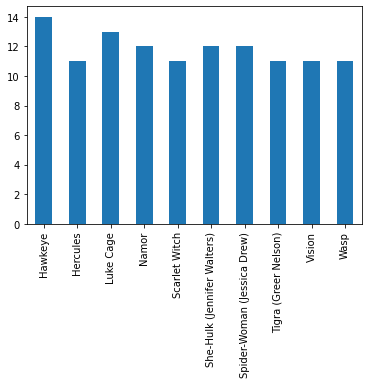

In [21]:
# Bar chart of top 5/10 characters and number events they're in
Top10Chars = TopChars[0:10]
Top10Chars = Top10Chars.sort_index()
TopCharChart = Top10Chars.plot(kind = 'bar')
TopCharChart
# Let's try and add a second bar showing overlapping events with other key characters

In [39]:
# Better - create "set" of events Iron Man and Spider-Man are in, get union of those events
IronEvents = set(XLessCharData.loc[(XLessCharData["CharName"]=="Iron Man"),"Event"])
SpiderEvents = set(XLessCharData.loc[(XLessCharData["CharName"]=="Spider-Man"),"Event"])
BPEvents = set(XLessCharData.loc[(XLessCharData["CharName"]=="Black Panther"),"Event"])
CaptAmerEvents = set(XLessCharData.loc[(XLessCharData["CharName"]=="Captain America"),"Event"])
Big4Events = [IronEvents, SpiderEvents, BPEvents, CaptAmerEvents]
Big4Overlap = set.intersection(*Big4Events)
# IronEvents
# SpiderEvents
print(f'Iron Man and Spider-Man are both in these events: {list(IronEvents.intersection(SpiderEvents))}')
Big4Overlap # Events that all of Black Panther, Iron Man, Spider Man and Captain America are in

Iron Man and Spider-Man are both in these events: [266, 269, 271, 273, 277, 37, 296, 302, 305, 309, 310, 59, 315, 317, 318, 319, 233, 234, 238, 116, 255]


{37, 238, 266, 269, 302, 315, 317, 319}

In [23]:
#Create sets for each Top 10 Character and see their overlaps with the Big 4
Hawkeye = set(XLessCharData.loc[(XLessCharData["CharName"]=="Hawkeye"),"Event"])
LukeCage = set(XLessCharData.loc[(XLessCharData["CharName"]=="Luke Cage"),"Event"])
SpiderWoman = set(XLessCharData.loc[(XLessCharData["CharName"]=="Spider-Woman (Jessica Drew)"),"Event"])
SheHulk = set(XLessCharData.loc[(XLessCharData["CharName"]=="She-Hulk (Jennifer Walters)"),"Event"])
Namor = set(XLessCharData.loc[(XLessCharData["CharName"]=="Namor"),"Event"])
ScarWitch = set(XLessCharData.loc[(XLessCharData["CharName"]=="Scarlet Witch"),"Event"])
Tigra = set(XLessCharData.loc[(XLessCharData["CharName"]=="Tigra (Greer Nelson)"),"Event"])
Wasp = set(XLessCharData.loc[(XLessCharData["CharName"]=="Wasp"),"Event"])
Hercules = set(XLessCharData.loc[(XLessCharData["CharName"]=="Hercules"),"Event"])
Vision = set(XLessCharData.loc[(XLessCharData["CharName"]=="Vision"),"Event"])
# HawkeyeInt = Hawkeye.intersection(Big4Overlap)
# HawkeyeInt = Hawkeye.intersection(Big4Overlap)
Top10Sets = [Hawkeye, LukeCage, SpiderWoman, SheHulk, Namor, ScarWitch, Tigra, Wasp, Hercules, Vision]

In [24]:
# Create for loop 
OverlapLens = []
for character in Top10Sets:
    OverlapLens.append(len(character.intersection(Big4Overlap)))
print(OverlapLens)

[3, 6, 6, 4, 5, 3, 4, 5, 3, 3]


In [25]:
TenCharDF = pd.DataFrame({"Event Count":Top10Chars,
                         "Overlaps w/ Big 4": OverlapLens})
TenCharDF = TenCharDF.reset_index()
#TenCharDF = TenCharDF.rename(columns={'index':"Character"})
TenCharDF = TenCharDF.replace("She-Hulk (Jennifer Walters)","She-Hulk")
TenCharDF = TenCharDF.replace("Spider-Woman (Jessica Drew)","Spider-Woman")
TenCharDF = TenCharDF.replace("Tigra (Greer Nelson)","Tigra")
TenCharDF = TenCharDF.set_index("index")
TenCharDF.index.name = None
TenCharDF

,Event Count,Overlaps w/ Big 4
Hawkeye,14,3
Hercules,11,6
Luke Cage,13,6
Namor,12,4
Scarlet Witch,11,5
She-Hulk,12,3
Spider-Woman,12,4
Tigra,11,5
Vision,11,3
Wasp,11,3


<ipython-input-78-53a277b2e6f2>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


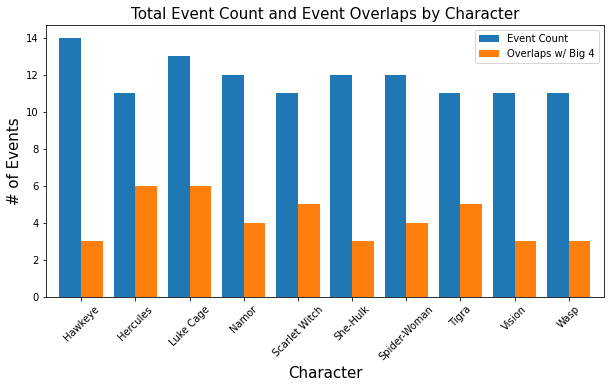

In [78]:
TenCharPlot = TenCharDF.plot(kind= "bar", width = .8, rot = 45, figsize = (10, 5))
TenCharPlot.set_xlabel("Character", fontsize = 15)
TenCharPlot.set_ylabel("# of Events", fontsize = 15)
TenCharPlot.set_title("Total Event Count and Event Overlaps by Character", fontsize = 15)
plt.savefig("marvel_files/CharBar.png")
plt.show()



In [112]:
# Pie chart of the 8 overlap events and how many total characters there are?
EightEvent = EventInfo.loc[EventInfo["Event #"].isin(Big4Overlap)]
EightEvent = EightEvent.reset_index(drop=True)
EightEvent

,Event #,Event Title,Event Description,# Chars in Event
0,238,Civil War,After a horrific tragedy raises questions on w...,101
1,302,Fear Itself,"The Serpent, God of Fear and brother to the Al...",151
2,315,Infinity,While the most powerful Avengers journey into ...,36
3,317,Inhumanity,"Following Infinity, the actions of Black Bolt ...",37
4,37,Maximum Security,At a meeting of the Shi'Ar intergalactic counc...,73
5,319,Original Sin,"Earth's Mightiest Heroes discover Uatu, the Wa...",37
6,266,Other - Evolve or Die,Just as Spider-Man discovers he's dying from a...,17
7,269,Secret Invasion,The shape-shifting Skrulls have been infiltrat...,100


In [155]:
# Loop to list top chars in event
Top10Names = ["Hawkeye","Luke Cage","Spider-Woman (Jessica Drew)", "She-Hulk (Jennifer Walters)", "Namor","Scarlet Witch", "Tigra (Greer Nelson)", "Wasp",  "Hercules", "Vision"]
Top8Events = EightEvent["Event #"]
namelist = []
eventlist = []
for x in range(len(Top8Events)):
    for y in range(len(Top10Names)):
        if Top8Events[x] in Top10Sets[y]:
            eventlist.append(Top8Events[x])
            namelist.append(Top10Names[y])
print(eventlist)

[238, 238, 238, 238, 238, 238, 238, 302, 302, 302, 302, 302, 302, 302, 302, 302, 315, 315, 315, 315, 315, 315, 317, 317, 317, 37, 37, 37, 37, 37, 37, 37, 319, 266, 266, 269, 269, 269, 269, 269, 269, 269]


In [219]:
Combo = pd.DataFrame({"Event":eventlist,
                     "Char": namelist})
TopCharsbyEvent = Combo.groupby("Event")["Char"].unique()
finallist = []
for event in Top8Events:
    finallist.append(TopCharsbyEvent.loc[event].tolist())
print(finallist)
# a = TopCharsbyEvent[37].tolist()
# print(a)
EightEvent
EightEvent["Top Chars"] = finallist
EightEvent

[['Luke Cage', 'Spider-Woman (Jessica Drew)', 'She-Hulk (Jennifer Walters)', 'Namor', 'Tigra (Greer Nelson)', 'Wasp', 'Vision'], ['Hawkeye', 'Luke Cage', 'Spider-Woman (Jessica Drew)', 'She-Hulk (Jennifer Walters)', 'Namor', 'Tigra (Greer Nelson)', 'Wasp', 'Hercules', 'Vision'], ['Hawkeye', 'Luke Cage', 'Spider-Woman (Jessica Drew)', 'Namor', 'Scarlet Witch', 'Wasp'], ['Luke Cage', 'Spider-Woman (Jessica Drew)', 'Namor'], ['Hawkeye', 'She-Hulk (Jennifer Walters)', 'Scarlet Witch', 'Tigra (Greer Nelson)', 'Wasp', 'Hercules', 'Vision'], ['Scarlet Witch'], ['Luke Cage', 'Spider-Woman (Jessica Drew)'], ['Luke Cage', 'Spider-Woman (Jessica Drew)', 'She-Hulk (Jennifer Walters)', 'Namor', 'Tigra (Greer Nelson)', 'Wasp', 'Hercules']]


,Event #,Event Title,Event Description,# Chars in Event,Top Chars
0,238,Civil War,After a horrific tragedy raises questions on w...,101,"[Luke Cage, Spider-Woman (Jessica Drew), She-H..."
1,302,Fear Itself,"The Serpent, God of Fear and brother to the Al...",151,"[Hawkeye, Luke Cage, Spider-Woman (Jessica Dre..."
2,315,Infinity,While the most powerful Avengers journey into ...,36,"[Hawkeye, Luke Cage, Spider-Woman (Jessica Dre..."
3,317,Inhumanity,"Following Infinity, the actions of Black Bolt ...",37,"[Luke Cage, Spider-Woman (Jessica Drew), Namor]"
4,37,Maximum Security,At a meeting of the Shi'Ar intergalactic counc...,73,"[Hawkeye, She-Hulk (Jennifer Walters), Scarlet..."
5,319,Original Sin,"Earth's Mightiest Heroes discover Uatu, the Wa...",37,[Scarlet Witch]
6,266,Other - Evolve or Die,Just as Spider-Man discovers he's dying from a...,17,"[Luke Cage, Spider-Woman (Jessica Drew)]"
7,269,Secret Invasion,The shape-shifting Skrulls have been infiltrat...,100,"[Luke Cage, Spider-Woman (Jessica Drew), She-H..."


In [70]:
# #venn diagram
# from matplotlib_venn import venn2, venn3
# import numpy as np

# venn2((IronEvents,SpiderEvents), set_labels = ("Iron Man", "Spider-Man") )

In [79]:
# import sys
# sys.path.append('../pyvenn')
#import matplotlib
#matplotlib.use('Agg')

#import venn
# courtesy of https://github.com/tctianchi/pyvenn

<ipython-input-86-d5260a1f7c41>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  fig.show()


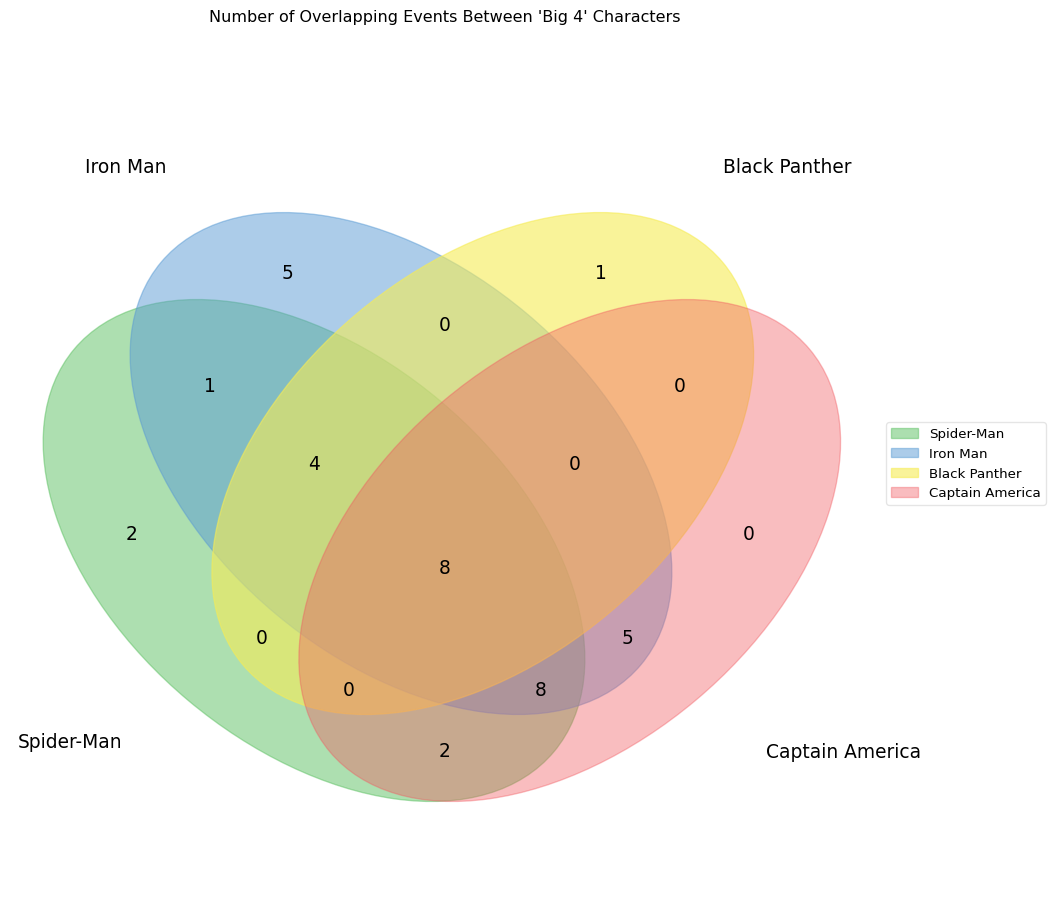

In [86]:
labels = venn.get_labels([IronEvents,SpiderEvents, BPEvents, CaptAmerEvents])
fig, ax = venn.venn4(labels, names=['Spider-Man', 'Iron Man', 'Black Panther', 'Captain America'])
ax.set_title("Number of Overlapping Events Between 'Big 4' Characters")
fig.savefig("marvel_files/B4venn.png")
fig.show()

In [96]:
# create dictionary of event names and characters in each to weight
text = ""
d = dict(zip(eventname, charcount))


{'Acts of Vengeance!': 103,
 'Age of Apocalypse': 91,
 'Age of Ultron': 14,
 'Age of X': 45,
 'All-New All-Different Marvel': 0,
 'Annihilation': 34,
 'Annihilation: Conquest': 18,
 'Armor Wars': 10,
 'Atlantis Attacks': 48,
 'Avengers Disassembled': 18,
 'Avengers NOW!': 0,
 'Avengers VS X-Men': 51,
 'Axis': 19,
 'Blood and Thunder': 13,
 'Chaos War': 52,
 'Civil War': 101,
 'Civil War II': 0,
 'Crossing': 11,
 'Dark Reign': 144,
 'Days of Future Present': 31,
 'Dead No More: The Clone Conspiracy': 10,
 'Enemy of the State': 15,
 'Evolutionary War': 49,
 'Fall of the Hulks': 10,
 'Fall of the Mutants': 42,
 'Fatal Attractions': 45,
 'Fear Itself': 151,
 'Heroic Age': 8,
 'House of M': 60,
 'Inferno': 63,
 'Infinity': 36,
 'Infinity Gauntlet': 0,
 'Infinity War': 58,
 'Inhumanity': 37,
 'Inhumans Vs. X-Men': 19,
 'Initiative': 86,
 "James Patterson's Max Ride": 0,
 'Kings of Pain': 37,
 "Kraven's Last Hunt": 4,
 'Marvel NOW!': 32,
 'Maximum Carnage': 16,
 'Maximum Security': 73,
 'Mess

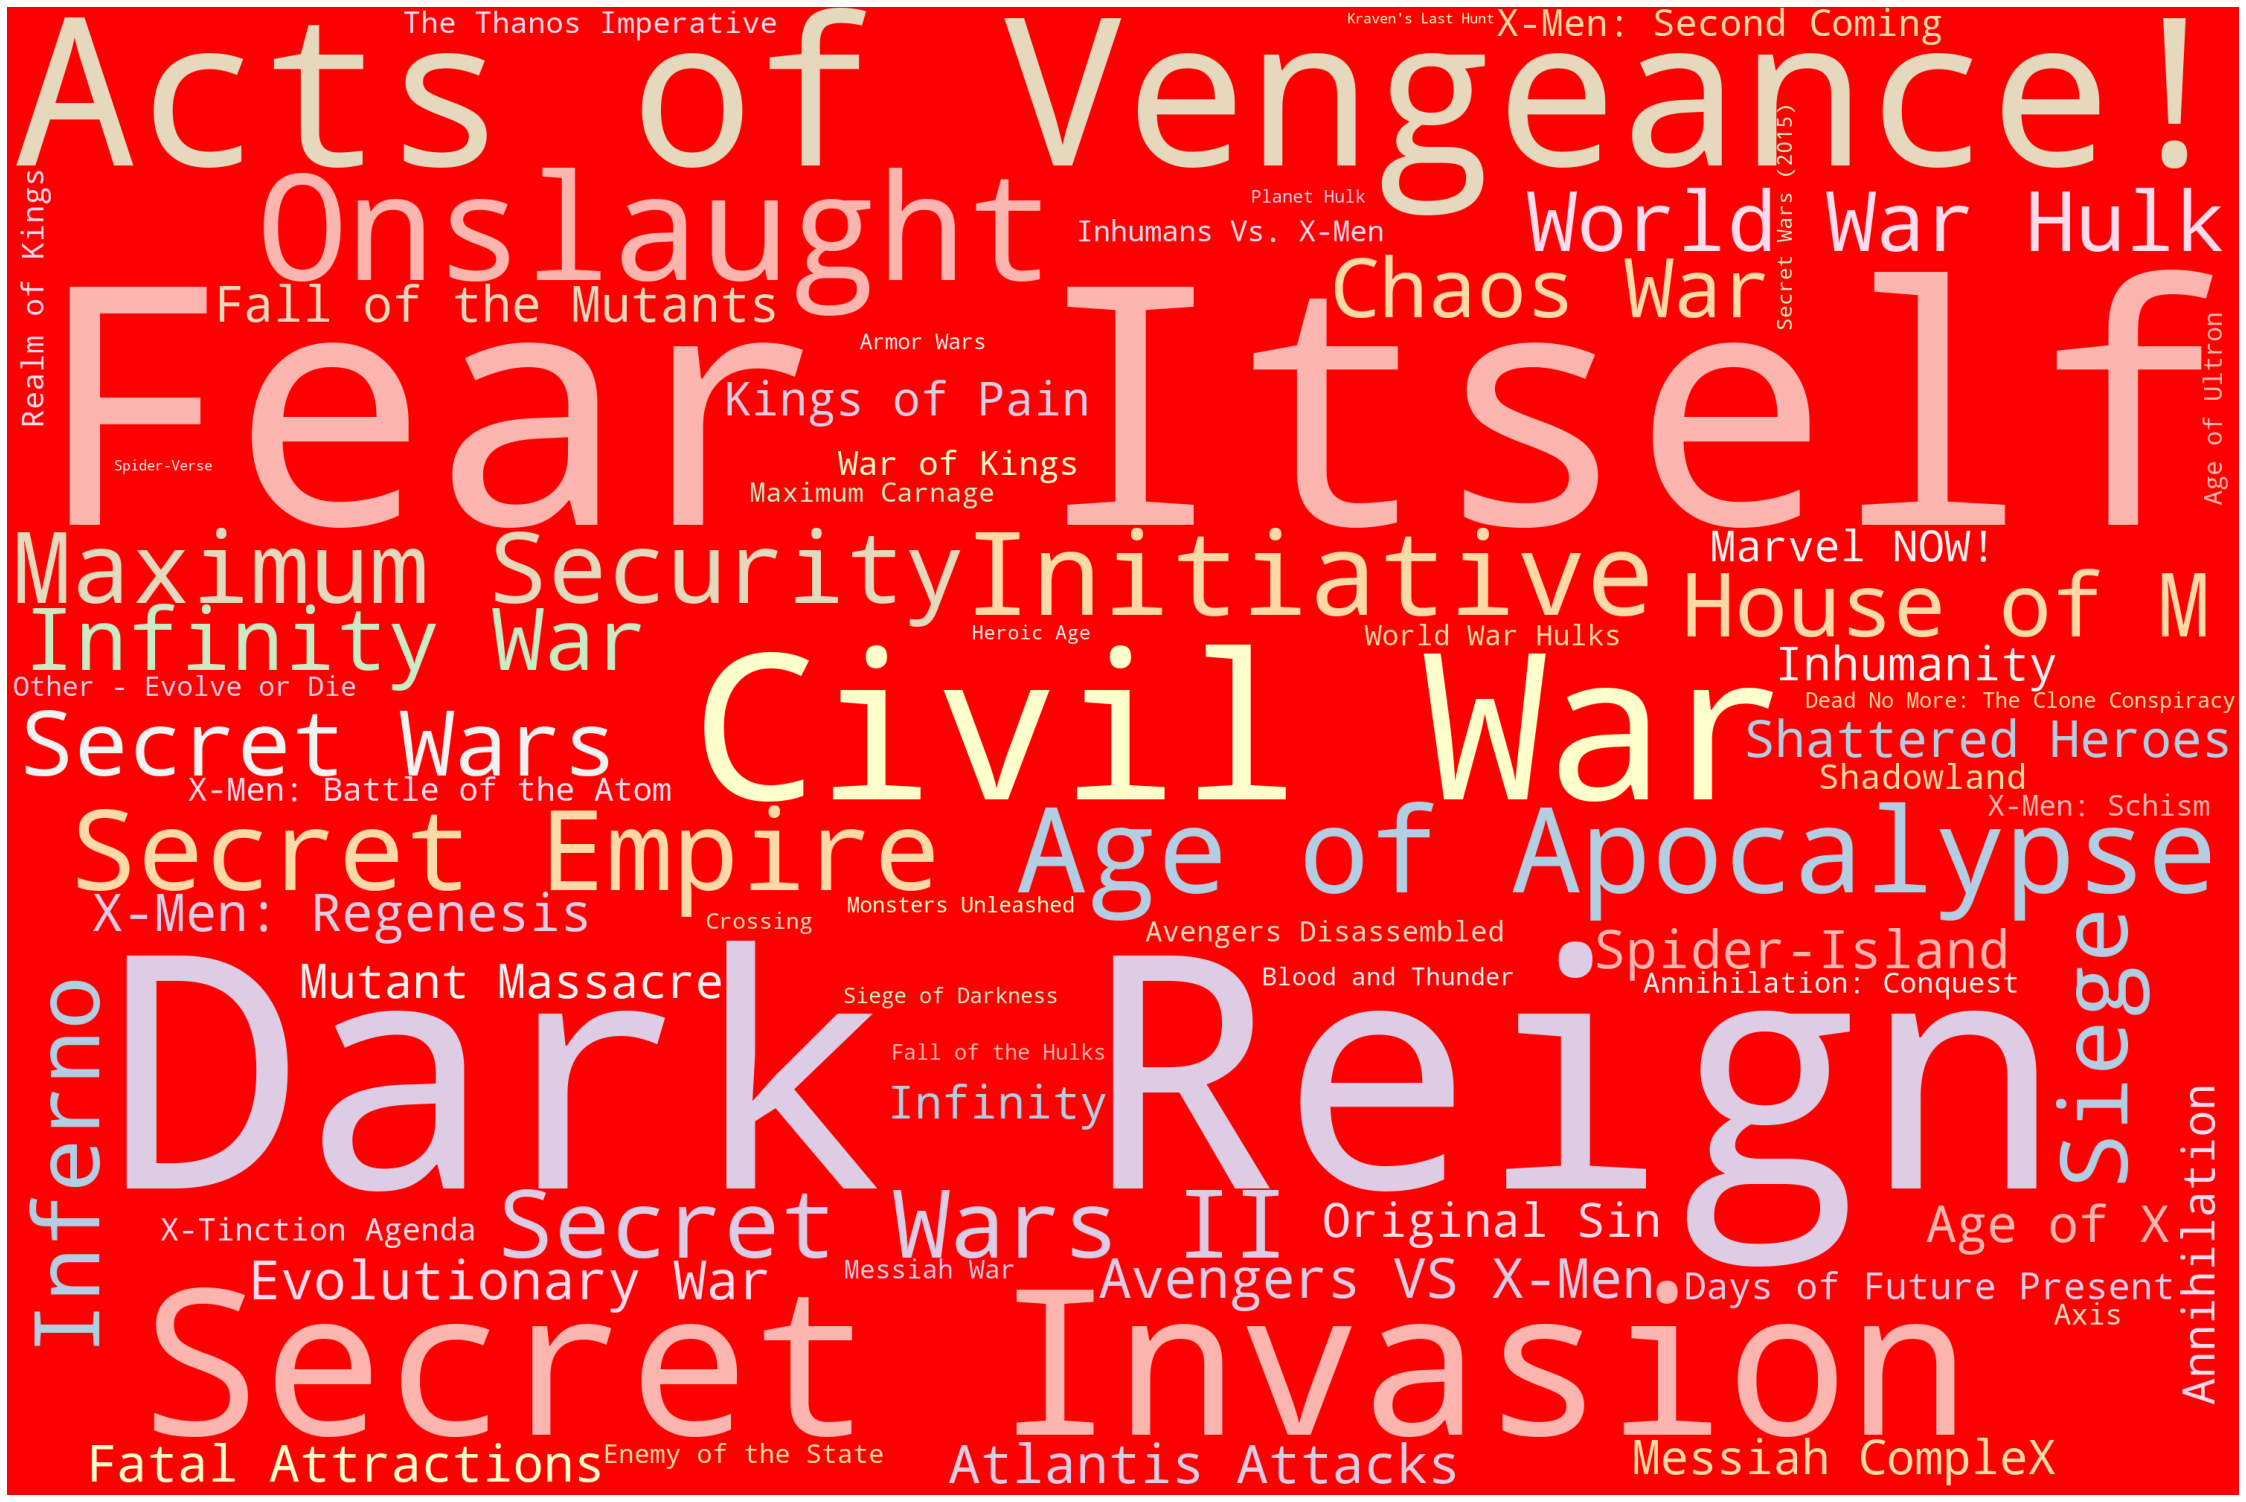

In [121]:
# Can we create a word cloud of all the events?
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Import package
from wordcloud import WordCloud, STOPWORDS
# import numpy as np
# from PIL import Image
# mask = np.array(Image.open('marvelcool.png'))
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='red', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(d)
# Plot
plot_cloud(wordcloud)
